# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={"metric"}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | murmashi
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | rokiskis
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | mangrol
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | remire-montjoly
Processing Record 17 of Set 1 | susuman
Processing Record 18 of Set 1 | kataragama
City not found. Skipping...
Processing Record 19 of Set 1 | prince george
Processing Record 20 of Set 1 | kapuskasing
Processing Reco

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,-9.67,73,0,4.00,RU,1731167565
1,bethel,41.3712,-73.4140,9.53,42,0,4.12,US,1731167626
2,port-aux-francais,-49.3500,70.2167,5.04,88,77,9.25,TF,1731167559
3,adamstown,-25.0660,-130.1015,22.82,88,100,7.27,PN,1731167549
4,katsuura,35.1333,140.3000,17.28,85,99,5.68,JP,1731167820


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,-9.67,73,0,4.00,RU,1731167565
1,bethel,41.3712,-73.4140,9.53,42,0,4.12,US,1731167626
2,port-aux-francais,-49.3500,70.2167,5.04,88,77,9.25,TF,1731167559
3,adamstown,-25.0660,-130.1015,22.82,88,100,7.27,PN,1731167549
4,katsuura,35.1333,140.3000,17.28,85,99,5.68,JP,1731167820


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

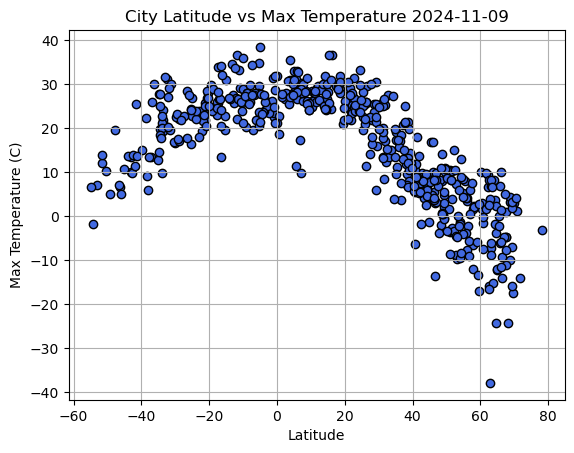

In [32]:
# Build scatter plot for latitude vs. temperature
lat_data = city_data_df["Lat"]
temp_data = city_data_df["Max Temp"]
plt.scatter(lat_data, temp_data, facecolor = "royalblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature 2024-11-09")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

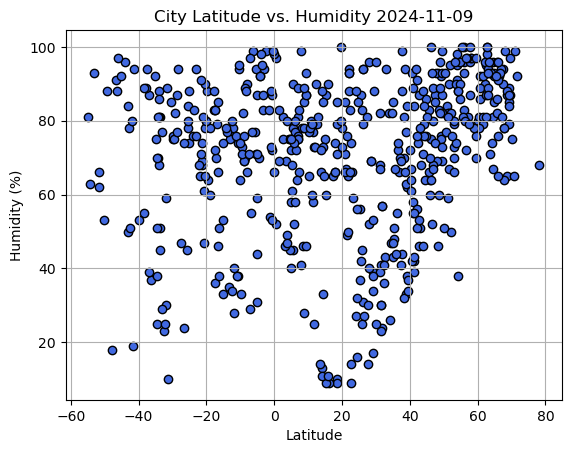

In [34]:
# Build the scatter plots for latitude vs. humidity
humid_data = city_data_df["Humidity"]
plt.scatter(lat_data, humid_data, facecolor = "royalblue", edgecolor = "black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Humidity 2024-11-09")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

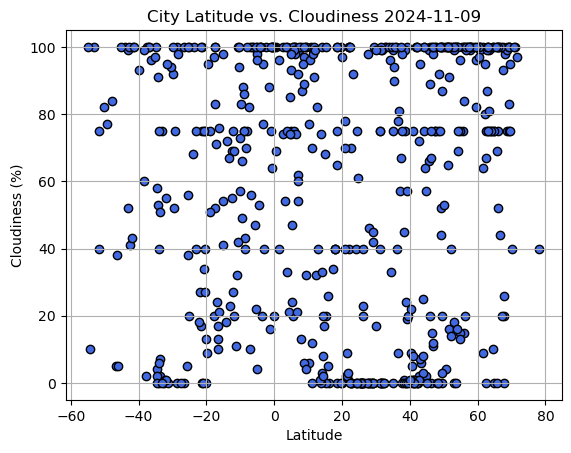

In [36]:
# Build the scatter plots for latitude vs. cloudiness
cloud_data = city_data_df["Cloudiness"]
plt.scatter(lat_data, cloud_data, facecolor = "royalblue", edgecolor = "black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Cloudiness 2024-11-09")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

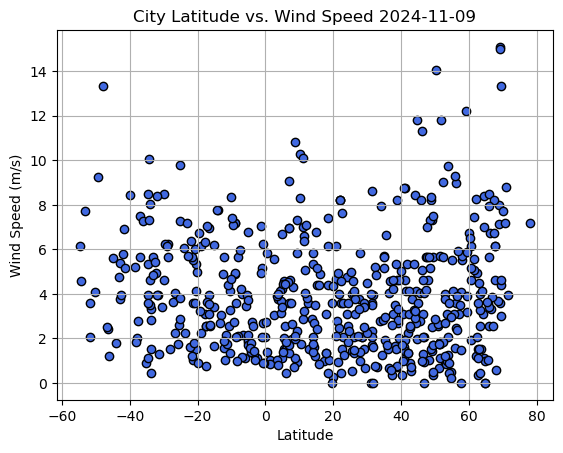

In [37]:
# Build the scatter plots for latitude vs. wind speed
wind_data = city_data_df["Wind Speed"]
plt.scatter(lat_data, wind_data, facecolor = "royalblue", edgecolor = "black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Wind Speed 2024-11-09")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
slope, int, rval, pval, std_err = st.linregress(weights_val, volume_mean)
correlation, _ = st.pearsonr(weights, volume_mean)


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,-9.67,73,0,4.00,RU,1731167565
1,bethel,41.3712,-73.4140,9.53,42,0,4.12,US,1731167626
4,katsuura,35.1333,140.3000,17.28,85,99,5.68,JP,1731167820
5,murmashi,68.8154,32.8115,3.23,65,75,8.00,RU,1731168034
6,iskateley,67.6803,53.1512,-4.57,78,26,6.17,RU,1731167756


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,5.04,88,77,9.25,TF,1731167559
3,adamstown,-25.0660,-130.1015,22.82,88,100,7.27,PN,1731167549
8,punta arenas,-53.1500,-70.9167,7.06,93,100,7.72,CL,1731167378
10,puerto ayora,-0.7393,-90.3518,22.53,87,64,2.68,EC,1731167578
12,puerto natales,-51.7236,-72.4875,12.25,66,40,3.60,CL,1731167569


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7518295836323229


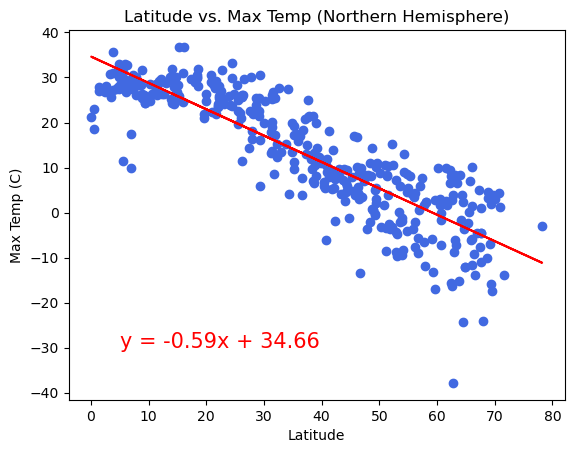

In [76]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]

slope, intercept, r_val, p_val, std_err = linregress(north_lat, north_temp)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
n_temp_regress = slope * north_lat + intercept

plt.scatter(north_lat, north_temp, facecolor = "royalblue")
plt.plot(north_lat, n_temp_regress, color = "red")
plt.annotate(line_eq,(5, -30),fontsize=15,color="red")
plt.title("Latitude vs. Max Temp (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r^2 value is: {r_val*r_val}")

The r^2 value is: 0.467822093891879


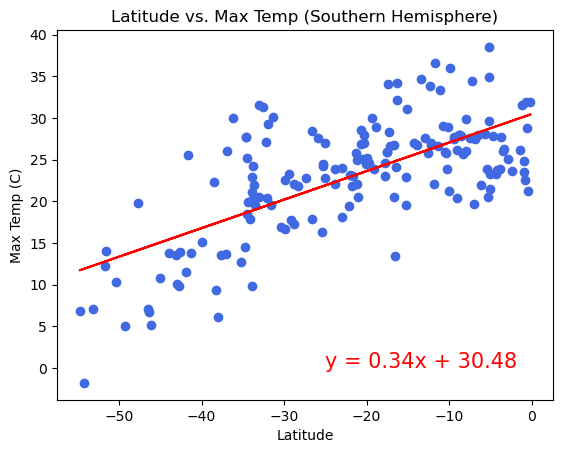

In [75]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]

slope, intercept, r_val, p_val, std_err = linregress(south_lat, south_temp)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
s_temp_regress = slope * south_lat + intercept

plt.scatter(south_lat, south_temp, facecolor = "royalblue")
plt.plot(south_lat, s_temp_regress, color = "red")
plt.annotate(line_eq, (-25, 0), fontsize=15,color="red")
plt.title("Latitude vs. Max Temp (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r^2 value is: {r_val*r_val}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.13129700179556827


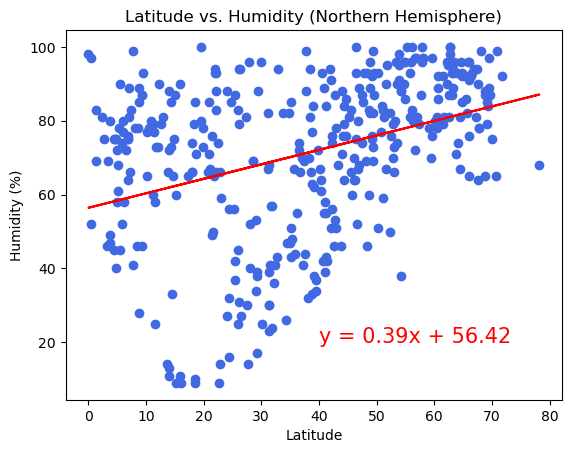

In [79]:
# Northern Hemisphere
north_humid = northern_hemi_df["Humidity"]

slope, intercept, r_val, p_val, std_err = linregress(north_lat, north_humid)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
n_humid_regress = slope * north_lat + intercept

plt.scatter(north_lat, north_humid, facecolor = "royalblue")
plt.plot(north_lat, n_humid_regress, color = "red")
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r^2 value is: {r_val*r_val}")

The r^2 value is: 0.008131285614326302


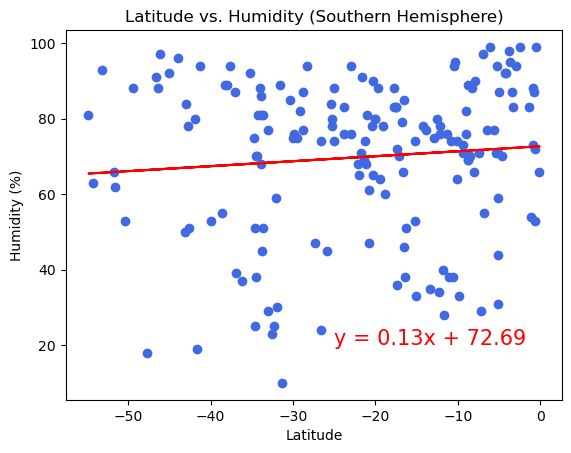

In [81]:
# Southern Hemisphere
south_humid = southern_hemi_df["Humidity"]

slope, intercept, r_val, p_val, std_err = linregress(south_lat, south_humid)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
s_humid_regress = slope * south_lat + intercept

plt.scatter(south_lat, south_humid, facecolor = "royalblue")
plt.plot(south_lat, s_humid_regress, color = "red")
plt.annotate(line_eq,(-25, 20),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r^2 value is: {r_val*r_val}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.024189716177685387


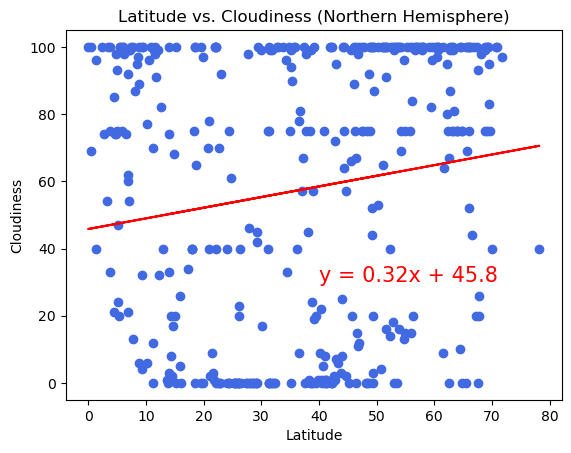

In [84]:
# Northern Hemisphere
north_clouds = northern_hemi_df["Cloudiness"]

slope, intercept, r_val, p_val, std_err = linregress(north_lat, north_clouds)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
n_clouds_regress = slope * north_lat + intercept

plt.scatter(north_lat, north_clouds, facecolor = "royalblue")
plt.plot(north_lat, n_clouds_regress, color = "red")
plt.annotate(line_eq,(40, 30),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r^2 value is: {r_val*r_val}")

The r^2 value is: 0.009118955144195457


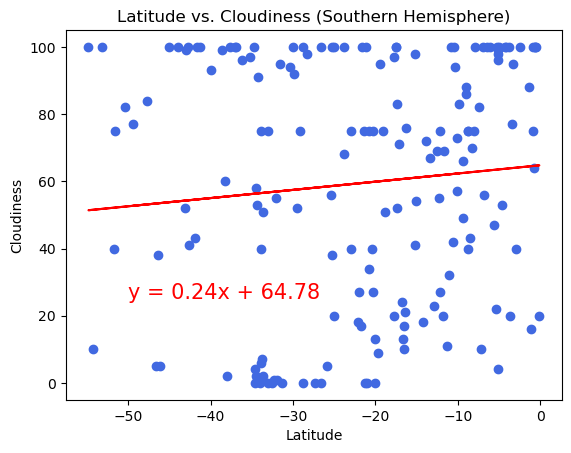

In [88]:
# Southern Hemisphere
south_clouds = southern_hemi_df["Cloudiness"]

slope, intercept, r_val, p_val, std_err = linregress(south_lat, south_clouds)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
s_clouds_regress = slope * south_lat + intercept

plt.scatter(south_lat, south_clouds, facecolor = "royalblue")
plt.plot(south_lat, s_clouds_regress, color = "red")
plt.annotate(line_eq,(-50, 25),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r^2 value is: {r_val*r_val}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.01998836749779867


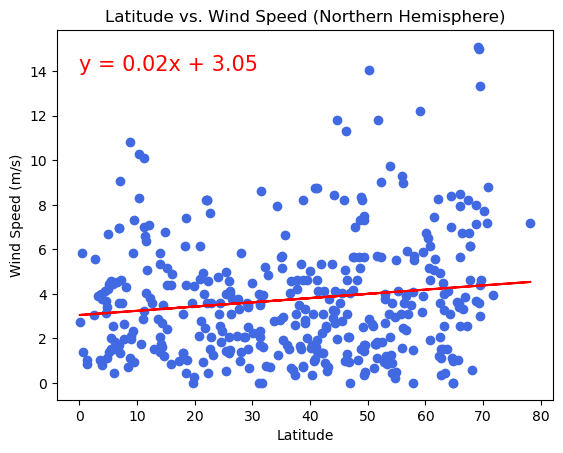

In [91]:
# Northern Hemisphere
north_wind = northern_hemi_df["Wind Speed"]

slope, intercept, r_val, p_val, std_err = linregress(north_lat, north_wind)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
n_wind_regress = slope * north_lat + intercept

plt.scatter(north_lat, north_wind, facecolor = "royalblue")
plt.plot(north_lat, n_wind_regress, color = "red")
plt.annotate(line_eq,(0, 14),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r^2 value is: {r_val*r_val}")

The r^2 value is: 0.07347313300643103


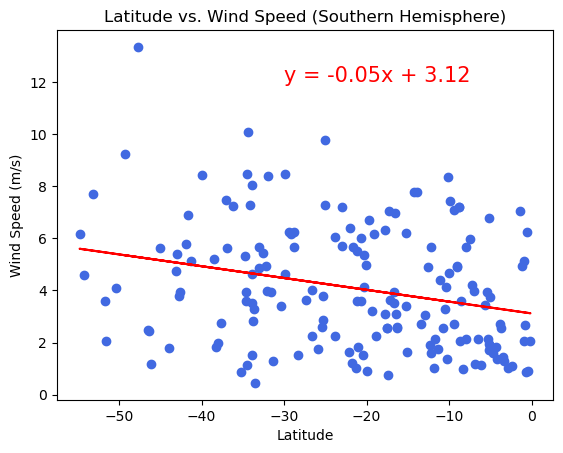

In [92]:
# Southern Hemisphere
south_wind = southern_hemi_df["Wind Speed"]

slope, intercept, r_val, p_val, std_err = linregress(south_lat, south_wind)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
s_wind_regress = slope * south_lat + intercept

plt.scatter(south_lat, south_wind, facecolor = "royalblue")
plt.plot(south_lat, s_wind_regress, color = "red")
plt.annotate(line_eq,(-30, 12),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r^2 value is: {r_val*r_val}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE